In [1]:
from analyzer import load_trajectory
from analyzer import (
    Geometry,
    TrajectoryUnit,
    get_invalid_trajectory,
    is_trajectory_valid,
)
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely
from shapely import LineString, Polygon

# Setup geometry & measurement area

## Prepare geometry

In [9]:
# geometry = Polygon([(-10, -2), (-10, 7), (10, 7), (10, -2), (-10, -2)])
geometry = shapely.from_wkt(
    "POLYGON ((4 6.25, 4 0.53, 2.4 0.53, 2.4 -0.53, 4 -0.53, 4 -8.5, -2.25 -8.5, "
    "-2.25 -0.53, -0.6 -0.53, -0.6 0.53, -2.25 0.53, -2.25 6.25, 4 6.25))"
)

geometry_pita = Geometry(geometry)
# geometry_pita.add_obstacle(
#     Polygon([(-9, -2), (-9, 0), (9, 0), (9, -2), (-9, -2)])
# )
# geometry_pita.add_obstacle(Polygon([(-9, 5), (-9, 7), (9, 7), (9, 5), (-9, 5)]))

## Prepare measurement details

In [3]:
ma = Polygon([(-1.5, 0), (-1.5, 5), (1.5, 5), (1.5, 0), (-1.5, 0)])
ml = LineString([(0, 0), (0, 5)])
passing_offset = 1.0

direction = np.array([-1, 0])

## Load trajectories

In [5]:
traj = load_trajectory(
    trajectory_file=pathlib.Path(
        "tests/reference_tests/data/bottleneck/traj.txt"
    ),
    default_unit=TrajectoryUnit.METER,
)

## Validate that trajectory is completely inside the walkable area.

In [10]:
print(f"Trajectory is valid: {is_trajectory_valid(traj, geometry_pita)}")
get_invalid_trajectory(traj, geometry_pita)

Trajectory is valid: True


,ID,frame,X,Y,Z,points


### Plot setup

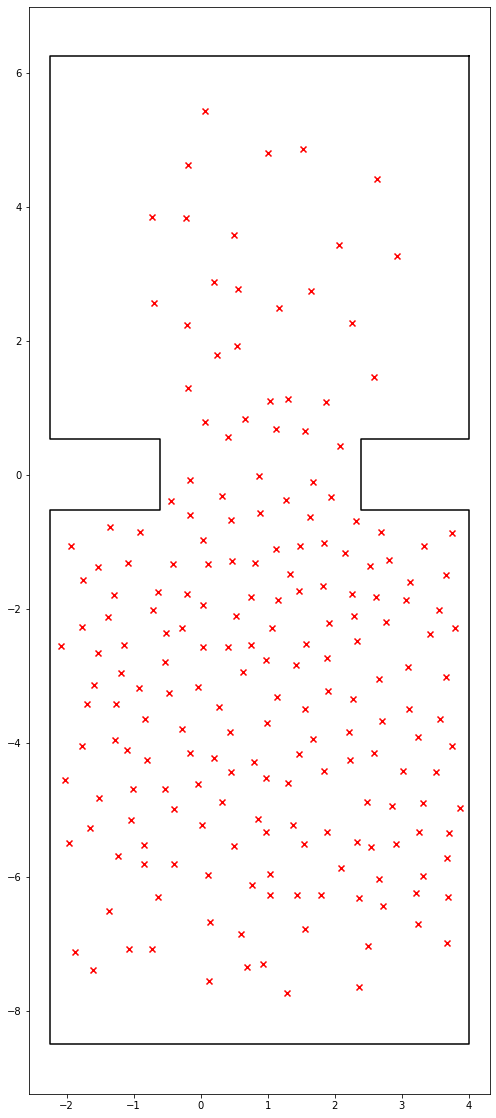

In [44]:
fig = plt.figure(figsize=(15, 20))
ax1 = fig.add_subplot(111, aspect="equal")

# Plot geometry
ax1.plot(*geometry_pita.walkable_area.exterior.xy, color="k")

## Plot measurement area
# ax1.plot(*ma.exterior.xy, color="g")
# ax1.fill(*ma.exterior.xy, color="g", alpha=0.1)
#
# ## Plot measurement lines
# ax1.plot(*ml.xy, color="b")
# ax1.plot(
#     *shapely.offset_curve(ml, passing_offset).xy,
#     color="orange",
# )

# Plot trajectories
for id, ped in traj.data[traj.data.frame == 110].groupby("ID"):
    # p = ax1.plot(ped["X"], ped["Y"], label=id, alpha=0.1, color="r")
    ax1.scatter(
        ped[ped.frame == ped.frame.max()]["X"],
        ped[ped.frame == ped.frame.max()]["Y"],
        # c=p[-1].get_color(),
        c="r",
        marker="x",
    )
    # if id == 313:
    #     ax1.scatter(
    #         ped[ped.frame == 127]["X"],
    #         ped[ped.frame == 127]["Y"],
    #         c="k",
    #         marker="x",
    #     )
plt.show()

# Density

## Classic density

In [ ]:
from analyzer import compute_classic_density

classic_density = compute_classic_density(traj.data, ma)
classic_density

In [ ]:
classic_density.reset_index().plot.line(x="frame", y="classic density")

## Voronoi density

In [ ]:
from analyzer import compute_voronoi_density

density_voronoi, individual = compute_voronoi_density(
    traj.data, ma, geometry_pita
)

In [ ]:
density_voronoi

In [ ]:
individual

In [ ]:
density_voronoi.reset_index().plot.line(x="frame", y="voronoi density")

In [ ]:
density_voronoi_cutoff, individual_cutoff = compute_voronoi_density(
    traj.data, ma, geometry_pita, (1.0, 12)
)

In [ ]:
density_voronoi_cutoff.reset_index().plot.line(x="frame", y="voronoi density")

## Comparision

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.plot(
    classic_density.reset_index().frame,
    classic_density["classic density"].values,
    label="classic",
    lw=3,
)
plt.plot(
    density_voronoi.reset_index().frame,
    density_voronoi["voronoi density"],
    label="voronoi",
    lw=3,
)
plt.plot(
    density_voronoi_cutoff.reset_index().frame,
    density_voronoi_cutoff["voronoi density"],
    label="voronoi cutoff",
    lw=3,
)
plt.xlabel("frame")
plt.ylabel("rho / 1/m^2")
plt.legend()
plt.grid()
plt.show()

## Plot voronoi cells

In [45]:
data

,ID,frame,individual voronoi,intersection voronoi,start,end,start_frame,end_frame,distance,speed
0,1,100,POLYGON ((-0.565788675886466 -2.06116074243590...,POLYGON EMPTY,POINT (-0.7362 -2.5164),POINT (-0.5197 -2.356),90.0,110.0,0.269445,0.215556
1,2,100,POLYGON ((-0.8126531098413107 -3.1643763280909...,POLYGON EMPTY,POINT (-1.1212 -3.5087),POINT (-0.9208 -3.1836),90.0,110.0,0.381903,0.305523
2,3,100,POLYGON ((-0.803665461656885 -1.28555799414674...,POLYGON EMPTY,POINT (-0.6612 -1.6341),POINT (-0.4054 -1.3295),90.0,110.0,0.397762,0.318210
3,4,100,POLYGON ((-1.2873419067623446 -3.8739009382921...,POLYGON EMPTY,POINT (-1.1661 -3.9964),POINT (-0.8361 -3.6424),90.0,110.0,0.483959,0.387167
4,5,100,POLYGON ((-0.7695989643926411 -6.1297530245905...,POLYGON EMPTY,POINT (-1.2281 -6.0009),POINT (-0.851 -5.815),90.0,110.0,0.420432,0.336346
...,...,...,...,...,...,...,...,...,...,...
6254,273,129,POLYGON ((3.460050130257124 -6.467555582709032...,POLYGON EMPTY,POINT (3.7019 -6.8408),POINT (3.4463 -6.7391),119.0,139.0,0.275090,0.220072
6255,286,129,POLYGON ((-1.1824743105189464 -5.0077580816335...,POLYGON EMPTY,POINT (-1.5398 -5.1834),POINT (-1.3401 -4.8481),119.0,139.0,0.390264,0.312211
6256,313,129,POLYGON ((0.7306742884857014 -7.59551757117638...,POLYGON EMPTY,POINT (0.3007 -7.972),POINT (0.2793 -7.8477),129.0,139.0,0.126129,0.201806
6257,323,129,"POLYGON ((1.14999490379679 -4.750356271053358,...",POLYGON EMPTY,POINT (1.0475 -5.1092),POINT (1.0515 -4.7652),119.0,139.0,0.344023,0.275219


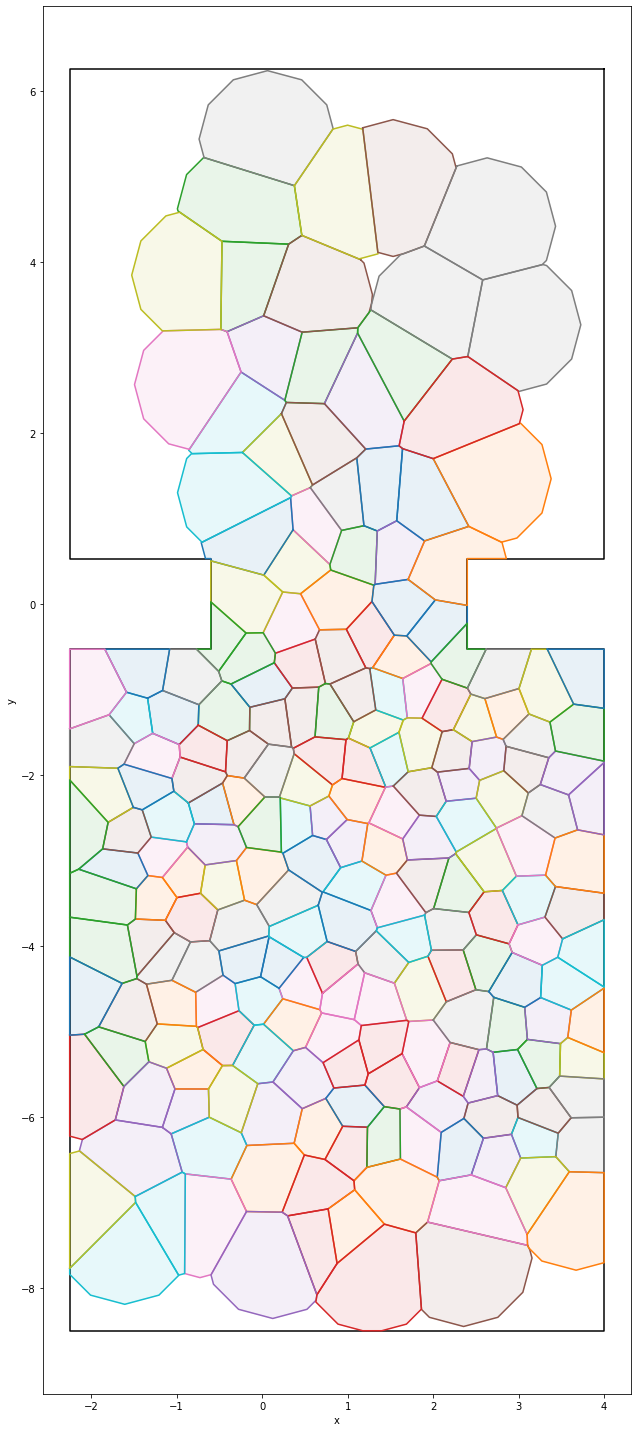

In [50]:
frame_start = 110

for frame in range(frame_start, frame_start + 1, 20):
    fig = plt.figure(figsize=(15, 20))
    ax1 = fig.add_subplot(111, aspect="equal")

    geo_shapely = geometry_pita.walkable_area
    ax1.plot(*geo_shapely.exterior.xy, color="k")
    for hole in geo_shapely.interiors:
        ax1.plot(*hole.xy, color="k")

    # ax1.plot(*ma.exterior.xy, color="k")

    df_frame = data[data.frame == frame]
    # df_frame = pd.merge(traj.data, df_frame, on=["ID", "frame"])
    for _, row in df_frame.iterrows():
        p = ax1.plot(*row[2].exterior.xy)
        # ax1.scatter(row[2], row[3])
        # ax1.plot(*row[6].exterior.xy, color=p[-1].get_color())
        ax1.fill(
            *row[2].exterior.xy,
            color=p[-1].get_color(),
            alpha=0.1,
        )
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")

    # ax2 = fig.add_subplot(122, aspect="equal")
    #
    # ax2.plot(*geo_shapely.exterior.xy, color="k")
    # for hole in geo_shapely.interiors:
    #     ax2.plot(*hole.xy, color="k")
    # ax2.plot(*ma.exterior.xy, color="k")
    #
    # df_frame_cutoff = individual_cutoff[individual_cutoff.frame == frame]
    # df_frame_cutoff = pd.merge(traj.data, df_frame_cutoff, on=["ID", "frame"])
    # for _, row in df_frame_cutoff.iterrows():
    #     p = ax2.plot(*row[6].exterior.xy)
    #     ax2.scatter(row[2], row[3])
    #
    #     ax2.plot(*row[6].exterior.xy, color=p[-1].get_color())
    #     ax2.fill(
    #         *row[6].exterior.xy,
    #         color=p[-1].get_color(),
    #         alpha=0.1,
    #     )
    #
    # ax2.set_xlabel("x")
    # ax2.set_ylabel("y")
    fig.tight_layout()
    plt.show()

## Passing density (individual)

In [ ]:
from analyzer import compute_passing_density
from analyzer import compute_frame_range_in_area

frames_in_area, _ = compute_frame_range_in_area(traj.data, ml, passing_offset)
passing_density = compute_passing_density(classic_density, frames_in_area)
passing_density

# Velocity

In [ ]:
from analyzer import compute_individual_velocity

individual_speed = compute_individual_velocity(traj.data, traj.frame_rate, 5)
individual_speed

In [ ]:
individual_speed.reset_index().plot.scatter(x="frame", y="speed")

In [ ]:
individual_speed_direction = compute_individual_velocity(
    traj.data, traj.frame_rate, 5, direction
)
individual_speed_direction

In [ ]:
individual_speed.reset_index().plot.scatter(x="frame", y="speed")

## Mean speed (all)

In [ ]:
from analyzer import compute_mean_velocity_per_frame

mean_speed, individual_speed = compute_mean_velocity_per_frame(
    traj.data, ma, traj.frame_rate, 10
)
mean_speed

In [ ]:
mean_speed.reset_index().plot.scatter(x="frame", y="speed")

In [ ]:
(
    mean_speed_direction,
    individual_speed_direction,
) = compute_mean_velocity_per_frame(
    traj.data, ma, traj.frame_rate, 5, direction
)
mean_speed_direction

## Mean speed (in measurement area)

In [ ]:
from analyzer import get_peds_in_area
from analyzer import compute_mean_velocity_per_frame

peds_in_area = get_peds_in_area(traj.data, ma)
mean_speed_area, individual_speed_area = compute_mean_velocity_per_frame(
    peds_in_area, ma, traj.frame_rate, 5
)

In [ ]:
mean_speed_area.reset_index().plot.scatter(x="frame", y="speed")

In [ ]:
(
    mean_speed_area_direction,
    individual_speed_area_direction,
) = compute_mean_velocity_per_frame(
    peds_in_area, ma, traj.frame_rate, 5, direction
)

In [ ]:
individual_speed_area_direction

In [ ]:
mean_speed_area_direction.reset_index().plot.scatter(x="frame", y="speed")

## Voronoi speed

In [ ]:
from analyzer.methods.density_calculator import (
    _compute_individual_voronoi_polygons,
    _compute_intersecting_polygons,
)
from analyzer import (
    compute_individual_velocity,
    compute_voronoi_velocity,
)

In [ ]:
individual_voronoi = _compute_individual_voronoi_polygons(
    traj.data, geometry_pita
)
intersecting_voronoi = _compute_intersecting_polygons(individual_voronoi, ma)

In [ ]:
voronoi_velocity, individual_velocity = compute_voronoi_velocity(
    traj.data, intersecting_voronoi, traj.frame_rate, 5, ma
)
voronoi_velocity

In [ ]:
voronoi_velocity.reset_index().plot.scatter(x="frame", y="voronoi speed")

In [ ]:
(
    voronoi_velocity_direction,
    individual_velocity_direction,
) = compute_voronoi_velocity(
    traj.data, intersecting_voronoi, traj.frame_rate, 5, ma, direction
)
voronoi_velocity_direction

## Comparison mean velocity vs voronoi velocity

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(
    voronoi_velocity.reset_index().frame, voronoi_velocity, label="voronoi"
)
plt.scatter(
    voronoi_velocity_direction.reset_index().frame,
    voronoi_velocity_direction,
    label="voronoi direction",
)
plt.scatter(
    mean_speed_area.reset_index().frame, mean_speed_area, label="classic"
)
plt.scatter(
    mean_speed_area_direction.reset_index().frame,
    mean_speed_area_direction,
    label="classic direction",
)
plt.xlabel("frame")
plt.ylabel("v / m/s")
plt.legend()
plt.grid()
plt.show()

## Passing speed (individual)

In [ ]:
from analyzer import compute_passing_speed
from analyzer import compute_frame_range_in_area

frames_in_area, _ = compute_frame_range_in_area(traj.data, ml, passing_offset)
passing_speed = compute_passing_speed(
    frames_in_area, traj.frame_rate, passing_offset
)
passing_speed

# Flow

## N-t diagram

In [ ]:
from analyzer import compute_n_t

nt, crossing = compute_n_t(traj.data, ml, traj.frame_rate)

In [ ]:
nt.plot(x="Time [s]")

## Flow

In [ ]:
from analyzer import compute_flow

delta_t = 100
flow = compute_flow(nt, crossing, individual_speed, delta_t, traj.frame_rate)
flow

# Profiles

In [51]:
from analyzer import compute_profiles
from analyzer import compute_voronoi_density
from analyzer import compute_voronoi_velocity
from analyzer.methods.profile_calculator import VelocityMethod

In [56]:
frames_data = traj.data[traj.data.frame.isin(range(110 - 10, 120 + 10))]

voronoi_density_frames, individual_frames = compute_voronoi_density(
    frames_data, ma, geometry_pita, (0.8, 12)
)
voronoi_velocity_frames, individual_velocity_frames = compute_voronoi_velocity(
    traj.data, individual_frames, traj.frame_rate, 10, ma
)
density_profiles, velocity_profiles = compute_profiles(
    pd.merge(
        individual_frames,
        individual_velocity_frames,
        on=["ID", "frame"],
        how="left",
    ),
    geometry_pita.walkable_area,
    0.2,
    VelocityMethod.VORONOI,
)

/home/tobias/development/jupedsim/venv-jpsreport-python/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in intersection
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/tobias/development/jupedsim/venv-jpsreport-python/lib/python3.8/site-packages/shapely/set_operations.py:132: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


In [35]:
data = pd.merge(
    individual_frames,
    individual_velocity_frames,
    on=["ID", "frame"],
    how="left",
)

density_profiles, velocity_profiles = compute_profiles(
    data, geometry_pita.walkable_area, 1, VelocityMethod.VORONOI
)

/home/tobias/development/jupedsim/venv-jpsreport-python/lib/python3.8/site-packages/shapely/set_operations.py:132: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


In [39]:
from analyzer.methods.profile_calculator import _get_grid_cells

In [40]:
grid_cells, rows, cols = _get_grid_cells(geometry_pita.walkable_area, 1)
density_profiles = []
velocity_profiles = []

for _, frame_data in data.groupby("frame"):
    grid_intersections_area = shapely.area(
        shapely.intersection(
            np.array(grid_cells)[:, np.newaxis],
            np.array(frame_data["individual voronoi"])[np.newaxis, :],
        )
    )

/home/tobias/development/jupedsim/venv-jpsreport-python/lib/python3.8/site-packages/shapely/set_operations.py:132: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


In [65]:
data[data.frame == 110]

,ID,frame,individual voronoi,intersection voronoi,start,end,start_frame,end_frame,distance,speed
2034,1,110,POLYGON ((-0.8624366975022968 -2.3281006786957...,POLYGON EMPTY,POINT (-0.6342 -2.3645),POINT (-0.4927 -2.2251),100.0,120.0,0.198632,0.158905
2035,2,110,POLYGON ((-0.7197677820567308 -3.3837053534006...,POLYGON EMPTY,POINT (-1.045 -3.3676),POINT (-0.8135 -3.1087),100.0,120.0,0.347306,0.277845
2036,3,110,POLYGON ((-0.7463180266123243 -1.4182088536217...,POLYGON EMPTY,POINT (-0.4857 -1.5939),POINT (-0.2141 -1.1981),100.0,120.0,0.480025,0.384020
2037,4,110,POLYGON ((-0.6121233694118602 -3.9384657019770...,POLYGON EMPTY,POINT (-1.0161 -3.8343),POINT (-0.6307 -3.4714),100.0,120.0,0.529367,0.423494
2038,5,110,POLYGON ((-1.165764888523155 -6.12164955321225...,POLYGON EMPTY,POINT (-1.1104 -5.9612),POINT (-0.9194 -5.5607),100.0,120.0,0.443713,0.354970
...,...,...,...,...,...,...,...,...,...,...
2234,257,110,"POLYGON ((3.335566698982065 -0.53, 4 -0.53, 4 ...",POLYGON EMPTY,POINT (3.8645 -0.8642),POINT (3.5669 -0.8196),100.0,120.0,0.300923,0.240739
2235,273,110,POLYGON ((3.0998378206067714 -7.37327096507941...,POLYGON EMPTY,POINT (3.7869 -7.2389),POINT (3.6911 -6.836),100.0,120.0,0.414133,0.331306
2236,286,110,POLYGON ((-2.075719561433199 -5.03215846224198...,POLYGON EMPTY,POINT (-1.7687 -5.4393),POINT (-1.5359 -5.1624),100.0,120.0,0.361759,0.289407
2237,323,110,POLYGON ((1.202367655150651 -5.627026939461978...,POLYGON EMPTY,POINT (1.0863 -5.453),POINT (1.0648 -5.0858),100.0,120.0,0.367829,0.294263


In [66]:
grid_intersections_area

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

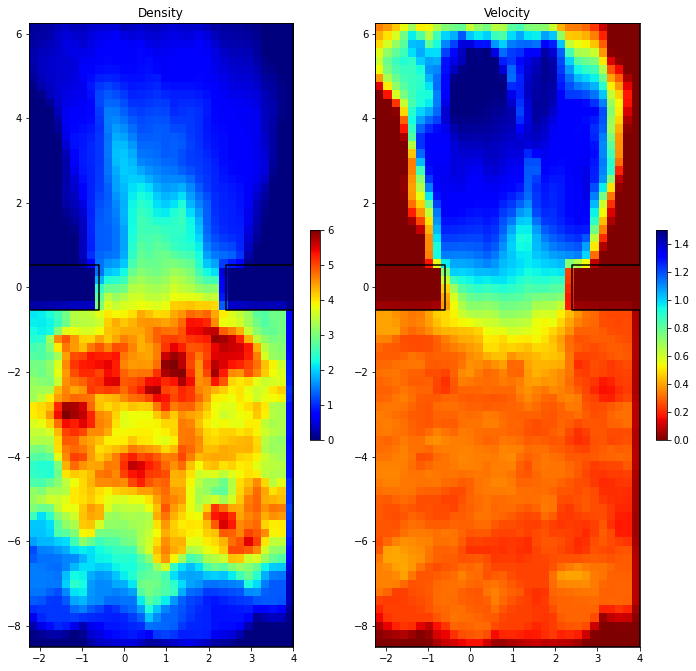

In [60]:
import matplotlib.pyplot as plt
import numpy as np

bounds = geometry_pita.walkable_area.bounds

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

ax0.set_title("Density")
cm = ax0.imshow(
    np.mean(density_profiles, axis=0),
    extent=[bounds[0], bounds[2], bounds[1], bounds[3]],
    interpolation="None",
    cmap="jet",
    vmin=0,
    vmax=6,
)
fig.colorbar(cm, ax=ax0, shrink=0.3)
ax0.plot(*geometry_pita.walkable_area.exterior.xy, color="k")


ax1.set_title("Velocity")
cm = ax1.imshow(
    np.mean(velocity_profiles, axis=0),
    extent=[bounds[0], bounds[2], bounds[1], bounds[3]],
    cmap="jet_r",
    vmin=0,
    vmax=1.5,
)
fig.colorbar(cm, ax=ax1, shrink=0.3)

ax1.plot(*geometry_pita.walkable_area.exterior.xy, color="k")

fig.tight_layout()